## <center><font color=navy>Big Data Economics</font></center>
### <center>Penalized Regression - Ridge Regression</center>
#### <center>Ali Habibnia</center>

    
<center> Assistant Professor, Department of Economics, </center>
<center> and Division of Computational Modeling & Data Analytics at Virginia Tech</center>
<center> habibnia@vt.edu </center> 

<div class="alert alert-block alert-info">

### <center>Penalized regression (a.k.a. shrinkage/regularization methods)</center>

Instead of solving the classic normal equation or using statistical tests for variable/model selection, penalized regression minimizes **constrained objective functions** to find the best set of regression parameters for a given data set. Typically, this is a set of parameters that model a linear relationship but also satisfy certain penalties for assigning **correlated** or **meaningless** variables to large regression coefficients.

<img src="images/penalize.jpg"  width="400">


> In this notebook we’ll describe the most commonly used penalized regression methods, including ridge regression, lasso regression and elastic net regression. 
</div>




### Readings:

1. ***Chapter 5.2  - 6.5,*** Graham Elliott, and Allan Timmermann, Economic Forecasting, Princeton University Press, 2016.
2. ***Chapter 3.4,*** [The Elements of Statistical Learning: Data Mining, Inference, and Prediction](https://web.stanford.edu/~hastie/ElemStatLearn/printings/ESLII_print12.pdf). 
3. [Bayesian Interpretations of Regularization](https://www.mit.edu/~9.520/spring09/Classes/class15-bayes.pdf)

### Goals

- The standard linear model performs poorly in a situation, where you have a large multivariate data set containing a number of variables superior to the number of samples, $p>>n$.

- A better alternative is the penalized regression allowing to create a linear regression model that is penalized, for having too many variables in the model, by adding a constraint in the equation. 

- The consequence of imposing this penalty, is to reduce (i.e. shrink) the coefficient values towards zero. This allows the less contributive variables to have a coefficient close to zero (or equal zero in LASSO).


### Bias-Variance Trade-Off in Multiple Regression

<center>  $  y = X\beta + \varepsilon $   </center>
<br>
<center>  $\varepsilon \sim N(0,\sigma^2) $   </center>
<br>
<center>  $  L_{OLS}(\hat\beta) = \sum_{i=1}^n (y_i - x_i' \hat\beta)^2 = ||y-X'\beta||^2$   </center>
<br>
<center>  $\hat\beta_{OLS} = (X′X)^{−1}(X′Y) $   </center>

> In statistics, there are two critical characteristics of estimators to be considered: the **bias** and the **variance**. 

The bias is the difference between the true population parameter and the expected estimator:

<br>
<center>  $Bias (\hat\beta_{OLS}) = E(\hat\beta_{OLS}) - \beta $   </center>

It measures the accuracy of the estimates. Variance, on the other hand, measures the spread, or uncertainty, in these estimates. It is given by

<br>
<center>  $Var (\hat\beta_{OLS}) = \sigma^2(X′X)^{−1} $   </center>

where the unknown error variance σ2 can be estimated from the residuals as

<center>  $\sigma^2 = \frac{\varepsilon' \varepsilon}{n-p} $   </center>

> #### Both the bias and the variance are desired to be low, as large values result in poor predictions from the model. 


<img src="images/tradeoff.jpg"  width="400">

This graphic illustrates what bias and variance are. Imagine the bull's-eye is the true population parameter that we are estimating, $\beta$, and the shots at it are the values of our estimates resulting from four different estimators - low bias and variance, high bias and variance, and the combinations thereof.

The model's error can be decomposed into three parts: 
1. error resulting from a large variance
2. error resulting from significant bias
3. the remainder - the unexplainable part

<br>
<center>  $E(\varepsilon) = Bias^2 + Variance + \sigma^2 $   </center>

<br>
<center>  $E(\varepsilon) = (E(X\hat\beta) - X\beta)^2 + E(X\hat\beta - E(X\hat\beta))^2 + \sigma^2
$   </center>

#### Proof

MSE is an unbiased estimator of $\sigma^2$ and the mean squared error of an estimator

<br>
<center>  $MSE (\hat\theta) = E([\hat\theta - \theta]^2) $   </center>

<br>
Can be re-expressed

<img src="images/mse.png"  width="500">





The OLS estimator has the desired property of being unbiased. However, it can have a huge variance. Specifically, this happens when:

1. The predictor variables are highly correlated with each other;
2. There are many predictors. This is reflected in the formula for variance given above: if $p$ approaches $n$, the variance approaches infinity.

> The general solution to this is: reduce variance at the cost of introducing some bias. This approach is called regularization and is almost always beneficial for the predictive performance of the model. 

<img src="images/tradeoff2.png"  width="500">

As the model complexity, which in the case of linear regression can be thought of as the number of predictors, increases, estimates' variance also increases, but the bias decreases. The unbiased OLS would place us on the right-hand side of the picture, which is far from optimal. That's why we regularize: to lower the variance at the cost of some bias, thus moving left on the plot, towards the optimum.

The introduction of a penalty term introduces bias into the model estimates, but it can significantly reduce variance, leading to better overall model performance on unseen data. 

### Lp Spaces and Norms: 

Lp spaces and norms are foundational concepts in functional analysis with critical applications in data science, particularly in regularization techniques for model selection. Let's delve deeper into the theory and explore additional norms.

#### Norms: Definition and Properties

A norm is a function that assigns a strictly positive length or size to all vectors in a vector space, except for the zero vector, which is given a length of zero. Norms are used to quantify the size or magnitude of vectors, which can be coefficients in a regression model, weights in a neural network, or any numerical features in a dataset.

Mathematically, a norm on a vector space $V$ over a field $\mathbb{F}$ is a function $\|\cdot\|: V \to \mathbb{R}$ that satisfies four main properties:

1. **Non-negativity**: For all $v \in V$, $\|v\| \geq 0$ and $\|v\| = 0$ if and only if $v$ is the zero vector.
2. **Scalar multiplication**: For any scalar $\alpha \in \mathbb{F}$ and vector $v \in V$, $\|\alpha v\| = |\alpha| \|v\|$.
3. **Triangle inequality**: For all $u, v \in V$, $\|u + v\| \leq \|u\| + \|v\|$.
4. **Definiteness**: $\|v\| = 0$ implies $v$ is the zero vector.

#### Lp Norms: An Overview

For a given real number $p \geq 1$, the Lp norm of a vector $\mathbf{x} \in \mathbb{R}^n$ is defined as:

$$
\|\mathbf{x}\|_p = \left(\sum_{i=1}^n |x_i|^p\right)^{1/p}
$$

This definition can be extended to functions, where the sum is replaced by an integral.

#### L0 Pseudo-Norm

While "L0 norm" is a bit of a misnomer since it doesn't satisfy all the properties of a mathematical norm, it is often called the "sparsity measure" or "pseudo-norm" because it simply counts the number of non-zero elements in a vector. In coding theory, the number of non-zero elements is sometimes called the "Hamming weight", which counts the number of symbols that are different from the zero symbol, and also in set theory, the count of non-zero elements of a vector can be considered as the "cardinality function" of the set of its non-zero components.

$$
\|\mathbf{x}\|_0 = \text{number of non-zero components of } \mathbf{x}
$$

In model selection, the L0 norm is ideal for feature selection, as it directly minimizes the number of features needed to represent the data. However, optimizing the L0 norm is an NP-hard problem and is computationally infeasible for large datasets.

#### Lp Norms with $p < 1$

Lp "norms" with $p < 1$ are not technically norms since they do not satisfy all the norm properties, particularly the triangle inequality. However, they are sometimes used to encourage sparsity even more aggressively than the L1 norm, but like the L0 norm, they are non-convex and thus lead to optimization problems that are difficult to solve.


#### Theoretical Implications in Model Selection

The choice of norm for regularization in model selection is dictated by the trade-off between complexity (variance) and sparsity (bias). 


- **L1 norm (Lasso, Manhattan, Taxicap)**: The L1 norm is convex, which allows for tractable optimization and produces sparse solutions, beneficial for models where feature selection is intrinsic to the problem.

- **L2 norm (Ridge, Tikhonov, Euclidean, Frobenius)**: The L2 norm is also convex but does not lead to sparsity. It is less sensitive to outliers than the L1 norm and is typically chosen when all features are expected to be relevant.

- **L0 pseudo-norm (sparsity, pseudo)**: Although it is the ideal for feature elimination, its non-convex nature makes it less practical. Approximation algorithms or heuristics are used in place of direct minimization.

- **Lp norms with $ p < 1 $ (Bridge)**: They can be seen as a bridge between L0 and L1 regularization, aiming to combine sparsity with computational feasibility. However, due to their non-convex nature, they are not commonly used in practice.


Regularization using Lp norms impacts the bias-variance trade-off:

- **High bias**: Simpler models with high bias can underfit the data, failing to capture underlying patterns.

- **High variance**: More complex models with low bias can overfit the data, capturing noise as if it were signal.

Regularization techniques aim to find a model with the right complexity that balances bias and variance, often leading to better generalization on unseen data.

The choice of $ p $ in Lp regularization is crucial as it directly influences model behavior. For example, Lasso (L1) can be a good choice when we suspect only a few features are important, while Ridge (L2) can be preferable when we believe many small and subtle effects exist.



<IPython.core.display.Javascript object>


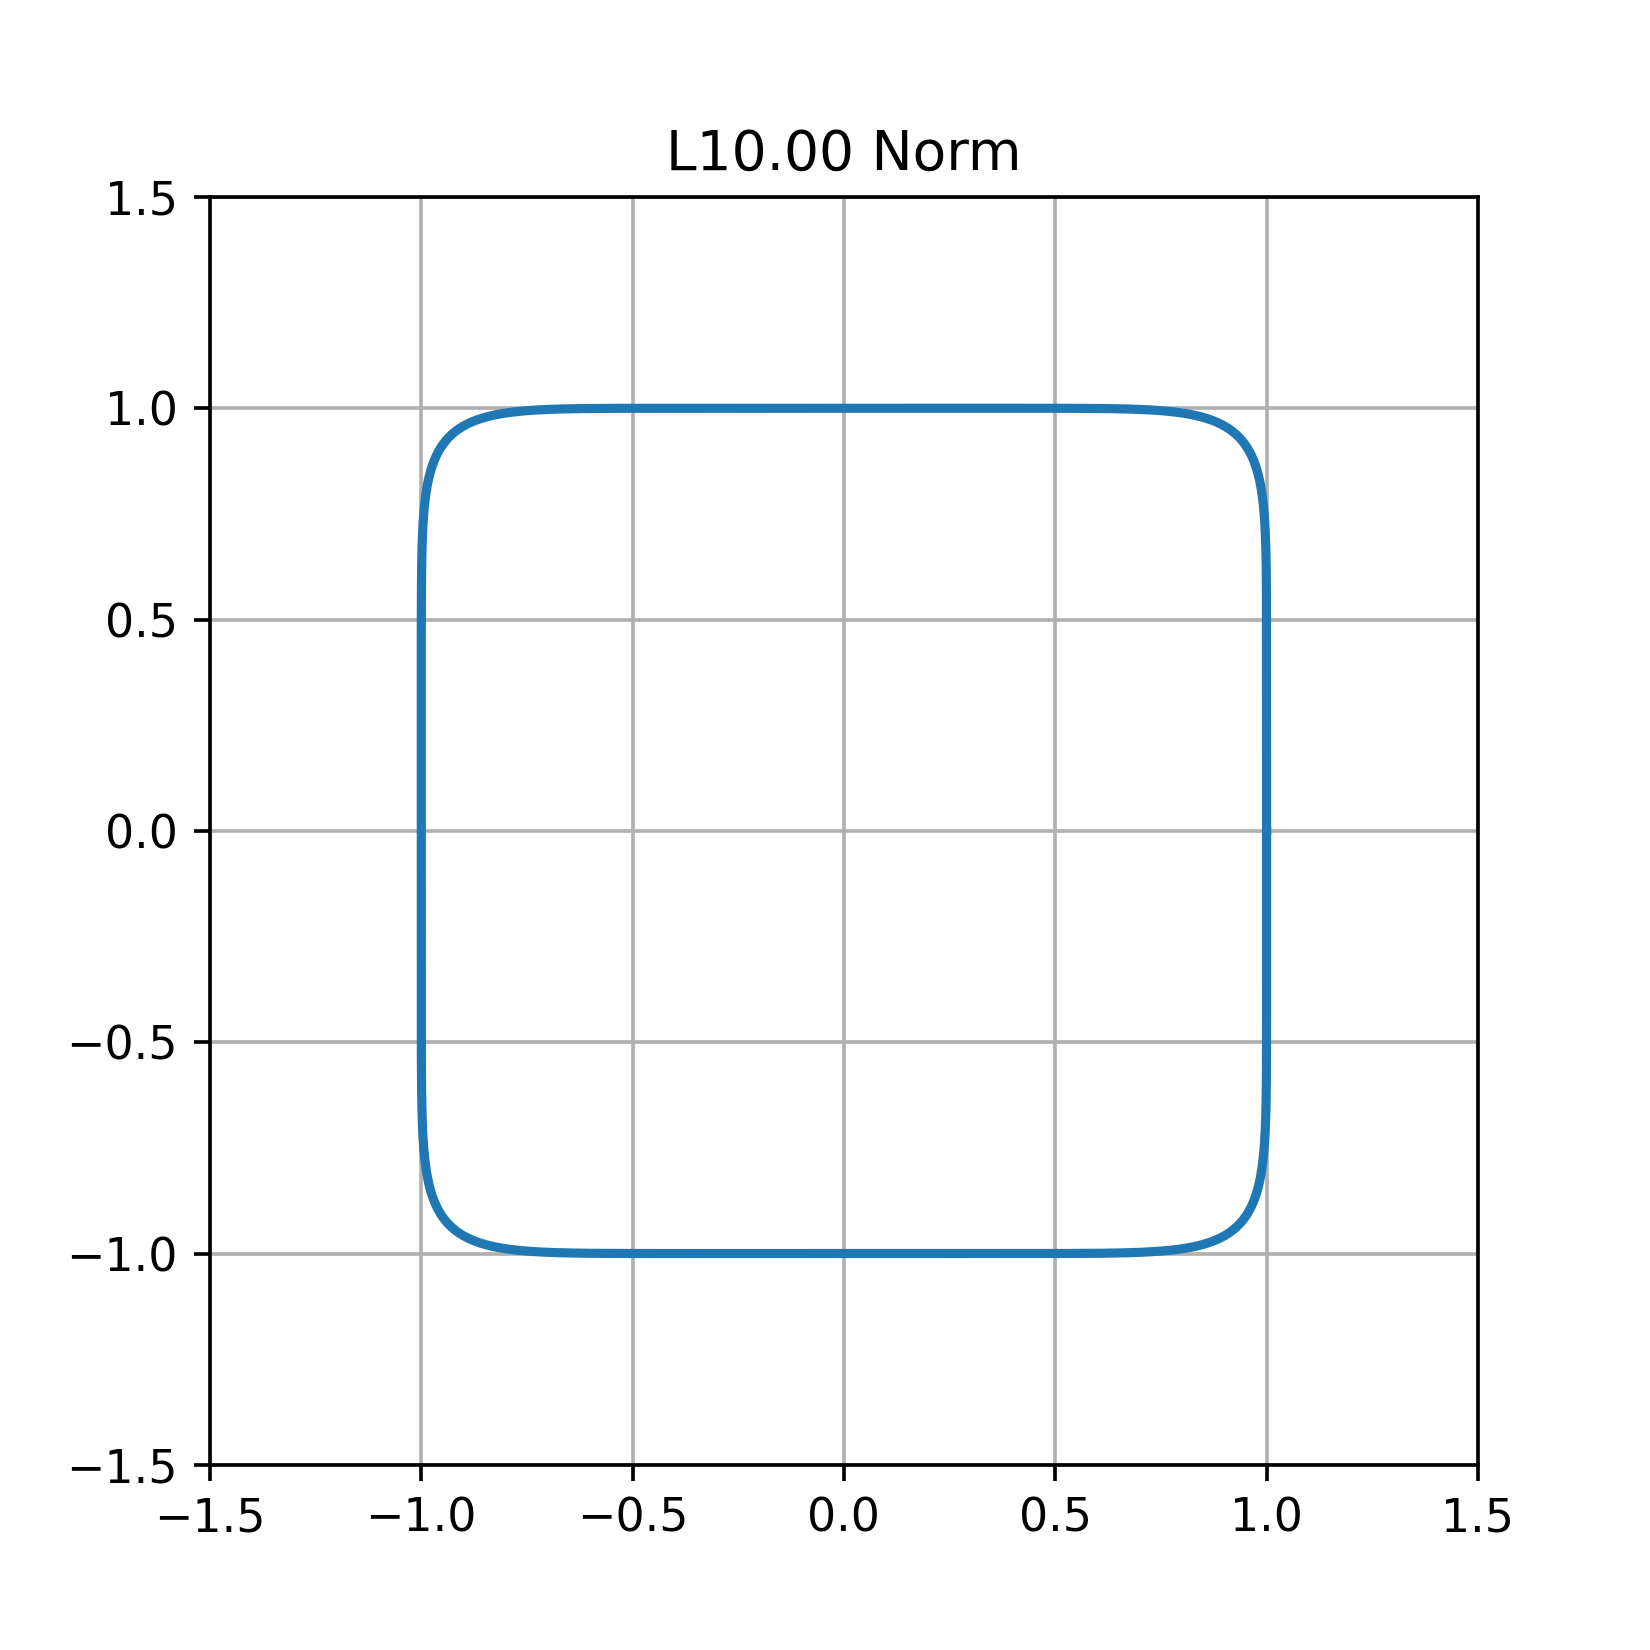

In [39]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Generate a figure and axis with specific size
fig, ax = plt.subplots(figsize=(5, 5))

# Generate points on a unit circle
theta = np.linspace(0, 2 * np.pi, 1000)
x_unit_circle = np.cos(theta)
y_unit_circle = np.sin(theta)

# Initialize the line object (note: use a tuple for a single plot)
line, = ax.plot([], [], lw=2)

# Set plot limits
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

# Set equal aspect ratio
ax.set_aspect('equal')

# Decorate the plot
ax.set_title('Lp Norm')
ax.grid(True)

# Initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# Animation function: this is called sequentially
def animate(p):
    if p < 1e-6:
        # Near-zero p: plot a cross
        x = np.sign(x_unit_circle) * (np.abs(x_unit_circle) >= np.abs(y_unit_circle))
        y = np.sign(y_unit_circle) * (np.abs(y_unit_circle) > np.abs(x_unit_circle))
    else:
        # General p: plot the Lp norm
        x = np.abs(x_unit_circle) ** (2 / p) * np.sign(x_unit_circle)
        y = np.abs(y_unit_circle) ** (2 / p) * np.sign(y_unit_circle)
    
    line.set_data(x, y)
    ax.set_title(f'L{p:.2f} Norm')
    return line,

# Values of p we want to animate
p_values = np.append(np.linspace(0, 1, 20, endpoint=False), np.linspace(1, 10, 50))

# Create the animation
ani = FuncAnimation(fig, animate, init_func=init, frames=p_values, blit=True, interval=20, repeat=False)

plt.show()


### Ridge Regression  (L-2 norm or Tikhonov regularization)
#### Ridge regression shrinks the regression coefficients, so that variables, with minor contribution to the outcome, have their coefficients close to zero.

- We would like to decrease the model complexity, that is the number of predictors. 
- We could use the forward or backward selection for this, but that way we would not be able to tell anything about the removed variables' effect on the response. 
- Removing predictors from the model can be seen as settings their coefficients to zero. 
- Instead of forcing them to be exactly zero, let's penalize them if they are too far from zero, thus enforcing them to be small in a continuous way. 
- Ridge regression penalizes the size of the regression coefficients.
- This way, we decrease model complexity while keeping all variables in the model. This, basically, is what Ridge Regression does.

#### Model Specification

In Ridge Regression, the OLS loss function is augmented in such a way that we not only minimize the sum of squared residuals but also penalize the size of parameter estimates, in order to shrink them towards zero. The shrinkage of the coefficients is achieved by penalizing the regression model with a penalty term called **L2-norm**, which is equivalent to square of the magnitude of the coefficients.

<br>
<center>  $L_{ridge}(\hat\beta) = \sum_{I=1}^n(y_i-x_i’\hat\beta)^2 + \lambda \sum_{j=1}^p\hat\beta^2 = ||y-X\hat\beta||^2 + ||\hat\beta||^2$   </center>

Remember that we can formulate and solve constrained optimization problems by using Lagrange multipliers (a good review of Lagrange multipliers without permanent scarring [here](http://www.cs.berkeley.edu/~klein/papers/lagrange-multipliers.pdf)).

This is equivalent to saying minimizing the loss/cost function under the condition as below

<br>
<center>  for some $~ C > 0, ~~ \sum_{j=1}^p\hat\beta^2< C$ </center>

The idea is to impose a constraint on the size of our parameters which can be modified or tuned through cross-validation. This constraint (or bias) is an additional variable that we control. The Lagrange multiplier $\lambda$, or tuning parameter $C$ controls the degree to which the coefficients are restricted. 

<img src="images/ridgelasso.png"  width="600">

- Geometrically, the l2-norm penalty can be thought of as constraining the coefficient vector to lie within a sphere, whereas the L1-norm constrains the coefficients to lie within a diamond shape. This geometric interpretation helps understand how the choice of norm affects the solution path of the coefficients.

- Using the constraints for the coefficients of Ridge and Lasso regression, we can plot the figure. 

- We will assume a hypothetical data-set with only two features.

- The elliptical contours are the cost function of linear regression. Now if we have relaxed conditions on the coefficients, then the constrained regions can get bigger and eventually they will hit the centre of the ellipse. This is the case when Ridge and Lasso regression resembles linear regression results. 

<img src="images/stable.png"  width="600">

- When using OLS, the estimates provided can often create a ridge in parameter space — the plane in the graph above where many different values on this space can do as well, or nearly as well, as the estimate provided.

- By adding a penalty or tuning factor, the OLS parameter space can be lifted up the thing that ridge causing a better estimate. It’s not guaranteed for a better estimate, but it can be helpful to explore when looking at additional regression techniques.

- As well, using a ridge regression method helps reduce the multicollinearity of endogenous variables in models. Multicollinearity creates inaccurate estimates of the regression coefficients.

Differentiating with respect to $\beta$ gives a system of equations. Setting these equations to zero and solving for the estimates which minimize the function is straightforward. It gives the ridge regression estimates $\hat\beta_{ridge} = (x'x+\lambda I)^{-1}(x'y)$
, where $I$ denotes the identity matrix.

**Theorem:** For any design matrix/model matrix/regressor matrix X, the quantity $(x'x+\lambda I)$ is always invertible; thus, there is always a unique solution

> Note that, the shrinkage requires the selection of a tuning parameter (lambda) that determines the amount of shrinkage.

The $\lambda$ parameter is the regularization penalty. So, setting $\lambda$ to 0 is the same as using the OLS, while the larger its value, the stronger is the coefficients' size penalized.



In [1]:
# Ridge regression from scratch with numpy

import numpy as np

def ridge_regression(x_train, y_train, lam):
    
    X = np.array(x_train)
    ones = np.ones(len(X))
    X = np.column_stack((ones,X))
    y = np.array(y_train)
    
    Xt = np.transpose(X)
    lambda_identity = lam*np.identity(len(Xt))
    theInverse = np.linalg.inv(np.dot(Xt, X)+lambda_identity)
    B = np.dot(np.dot(theInverse, Xt), y)
    y_hat = np.dot(x,B)
    return B, y_hat


<div class="alert alert-block alert-info">
We can also solve for the vector $\beta$ numerically by using a gradient search method like gradient descent or stochastic gradient descent. In this case, we use an algorithm iteratively decrease or ‘descend’ the values of the gradient to hit the minimum until some threshold or number of iterations is met.
</div>

#### Bias-Variance Trade-Off in Ridge Regression

Incorporating the regularization coefficient in the formulas for bias and variance gives us

<img src="images/ridge1.png"  width="350">

It can be shown that the total variance is a monotone decreasing sequence with respect to $\lambda$, while the total squared bias is a monotone increasing sequence with respect to $\lambda$.

> This poses the question: how much bias are we willing to accept in order to decrease the variance? Or: what is the optimal value for $\lambda$?

**Existence Theorem:** There always exists a $\lambda$ such that the MSE of $\hat\beta_{ridge}^\lambda$ is less than the MSE of  $\hat\beta_{OLS}$

One disadvantage of the ridge regression is that, it will include all the predictors in the final model, unlike the stepwise regression methods, which will generally select models that involve a reduced set of variables.

Ridge regression shrinks the coefficients towards zero, but it will not set any of them exactly to zero. The lasso regression is an alternative that overcomes this drawback.

#### Choice of Regularization Parameter

There are two ways we could tackle this issue. 

1. A more traditional approach would be to choose λ such that some information criterion, e.g., AIC or BIC, is the smallest.

    - Information criteria are a common way of choosing among models while balancing the competing goals of fit and parsimony.

    - This approach boils down to estimating the model with many different values for λ and choosing the one that minimizes the Akaike or Bayesian Information Criterion.
    

2. A more machine learning-like approach is to perform cross-validation and select the value of λ that minimizes the cross-validated sum of squared residuals (or some other measure). The former approach emphasizes the model's fit to the data, while the latter is more focused on its predictive performance. 

    - To choose λ through cross-validation, you should choose a set of p different values of λ to test, split the dataset into K folds, and follow this algorithm:

<img src="images/cv.png"  width="400">

<img src="images/cv2.jpg"  width="400">





> One more thing: ridge regression assumes the predictors are standardized and the response is centered!

This scaling ensures that the penalty term penalizes each coefficient equally. If the predictors are not standardized, their standard deviations are not all equal to one, and it can be shown with some math that the unstandardized coefficients are then weighted by the inverse of the standard deviations of their corresponding predictors.

### Example: Ridge Regression on Boston Housing Dataset

Let's see how the these shrinkage models work with the Housing dataset.

Here is some description of our data:

    * CRIM - per capita crime rate by town
    * ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    * INDUS - proportion of non-retail business acres per town.
    * CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    * NOX - nitric oxides concentration (parts per 10 million)
    * RM - average number of rooms per dwelling
    * AGE - proportion of owner-occupied units built prior to 1940
    * DIS - weighted distances to five Boston employment centres
    * RAD - index of accessibility to radial highways
    * TAX - full-value property-tax rate per 10,000 dollars
    * PTRATIO - pupil-teacher ratio by town
    * B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    * LSTAT - percent lower status of the population
    * MEDV(TARGET) - Median value of owner-occupied homes in $1000's



In [3]:
# dataframe and plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# scaling and dataset split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# OLS, Ridge
from sklearn.linear_model import LinearRegression, Ridge
# model evaluation
from sklearn.metrics import r2_score, mean_squared_error

Now the dataset is loaded, subsequently, the features should be standardized. Since ridge regression shrinks coefficients by penalizing, the features should be scaled for start condition to be fair.

In [8]:
# Load Boston housing dataset\
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# Extract features and target variable
X = df.drop('medv', axis=1)  # Assuming 'medv' column is the target variable
y = df['medv']

# Standardize the features
X_scaled = preprocessing.scale(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=10)

# Display the first few rows of the DataFrame to verify
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Next, we can iterate the lambda values ranged from 0 to 199. Note that the coefficients at lambda equal to zero (x = 0) are the same with the OLS coefficients.

In [11]:
# Initialize a list to store coefficient data
coefficients = []

# Iterate over a range of alpha values
for alpha in np.arange(0, 200, 1):
    # Training
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    
    # Collect coefficients
    coefficients.append(ridge_reg.coef_)

# Convert the list of coefficients into a DataFrame
# Transpose it so that each row represents an alpha value and each column represents a feature
coefficients_df = pd.DataFrame(coefficients, columns=df.columns.drop('medv'))

# Optionally, add the alpha values as a column or index to the DataFrame
coefficients_df['alpha'] = np.arange(0, 200, 1)
coefficients_df.set_index('alpha', inplace=True)


Now, we can draw plot from the data frame. Only five attributes are selected for better visualization.

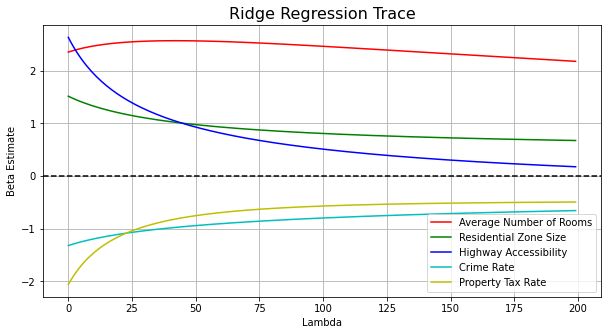

In [16]:
import matplotlib.pyplot as plt
import numpy as np  # Ensure numpy is imported

# Adjusted list of features to plot based on actual column names in the DataFrame
features_to_plot = ['rm', 'zn', 'rad', 'crim', 'tax']

# Colors for each feature plot
colors = ['r', 'g', 'b', 'c', 'y']

fig, ax = plt.subplots(figsize=(10, 5))

# Plot each feature
for feature, color in zip(features_to_plot, colors):
    # Convert DataFrame index and column to numpy arrays explicitly
    x_values = np.array(coefficients_df.index)
    y_values = np.array(coefficients_df[feature])
    ax.plot(x_values, y_values, color=color, label=feature)

ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['Average Number of Rooms', 'Residential Zone Size', 'Highway Accessibility', 'Crime Rate', 'Property Tax Rate'])
ax.grid(True)

plt.show()


‘Room’ should be the best indicator for house price by intuition. This is why the line in red does not quite shrink over iteration. On the contrary, ‘Highway Access’ (blue) decreases remarkably, which means the feature loses its importance as we seek more general models. If we increase the lambda more and more (extremely biased), then only ‘Room’ would stay significant, which makes sense again because the number of rooms must explain the most.